# AUTHOR : SHIVANG SHEKHAR

## GRIP @ The Sparks Foundation

## Task 6 : Prediction using Decision Tree Algorithm
In this task, for the given dataset We have to create the Decision Tree classifier and visualized it graphically. The purpose of this task is if we feed any new data to this classifier, it would be able to predict the right class accordingly.

###  Importing the required libraries

In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import plot_tree

### Import Dataset

In [3]:
df = pd.read_csv("C:\Downloads\iris.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
# To drop the Id column
df.drop('Id',axis=1,inplace=True) 
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
df.shape

(150, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.3+ KB


In [7]:
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<AxesSubplot:>

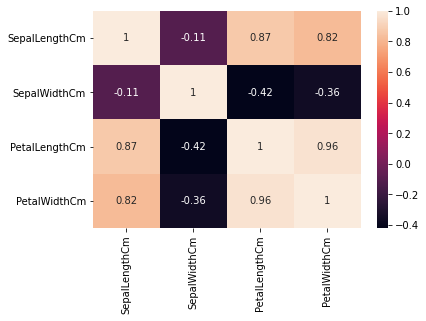

In [8]:
df.corr()
sns.heatmap(df.corr(),annot=True)

Petal Length and Petal Width are highly correlated with each other, Sepal Length is Moderately correlated with Petal Length and Petal Width whereas Sepal Width is negatively correlated with other three.

## Visualizing the data

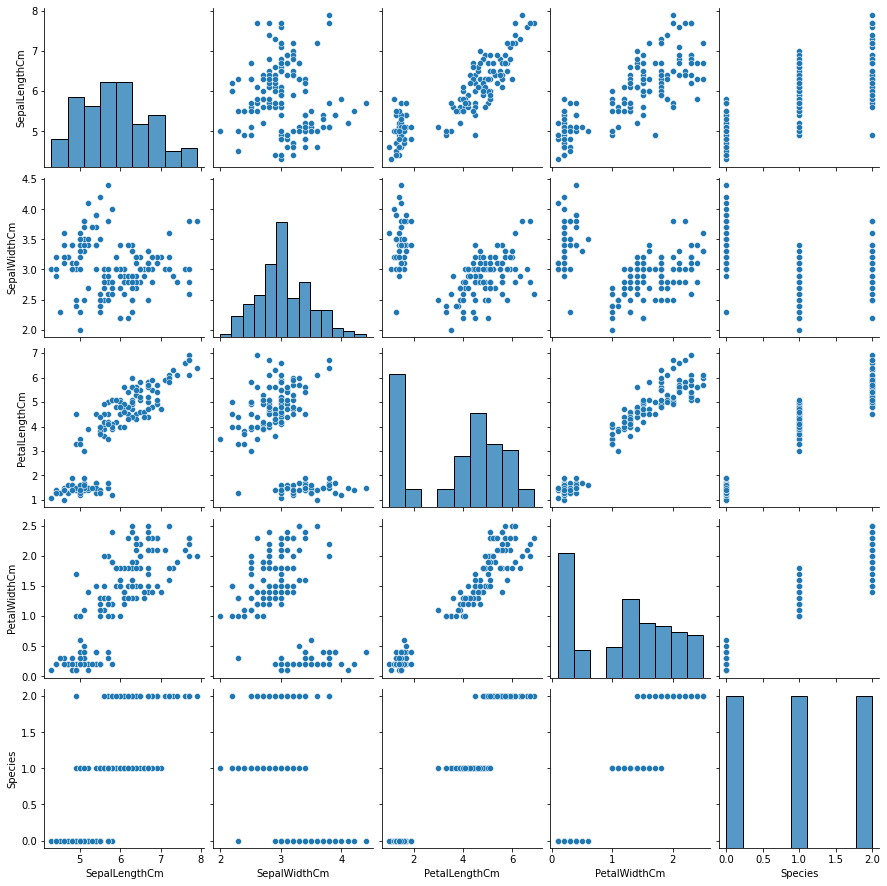

In [10]:
# Label encoding

X=df.iloc[:,[0,1,2,3]].values

from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df.Species = le.fit_transform(df.Species)
y=df.iloc[:,[4]].values
y=y.reshape(-1)

# Input data Visualization
sns.pairplot(df)

## Decision Tree Model Training

In [12]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [14]:
model=DecisionTreeClassifier(random_state=0)
model.fit(X_train,y_train)  #To train the model and create the classifier
print("Decision Tree Classifier Created!")

Decision Tree Classifier Created!


In [15]:
#Comparing the Actual and Predicted Values
y_pred = model.predict(X_test)
check = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
check

,Actual,Predicted
0,2,2
1,1,1
2,0,0
3,2,2
4,0,0
5,2,2
6,0,0
7,1,1
8,1,1
9,1,1


## Visualizing the trained model

[Text(418.5, 747.4499999999999, 'PetalWidthCm <= 0.8\ngini = 0.6649\nsamples = 120\nvalue = [39, 37, 44]\nclass = Iris-virginica'),
 Text(354.11538461538464, 611.55, 'gini = 0.0\nsamples = 39\nvalue = [39, 0, 0]\nclass = Iris-setosa'),
 Text(482.8846153846154, 611.55, 'PetalWidthCm <= 1.75\ngini = 0.4963\nsamples = 81\nvalue = [0, 37, 44]\nclass = Iris-virginica'),
 Text(257.53846153846155, 475.65, 'PetalLengthCm <= 4.95\ngini = 0.18\nsamples = 40\nvalue = [0, 36, 4]\nclass = Iris-versicolor'),
 Text(128.76923076923077, 339.74999999999994, 'PetalWidthCm <= 1.65\ngini = 0.0555\nsamples = 35\nvalue = [0, 34, 1]\nclass = Iris-versicolor'),
 Text(64.38461538461539, 203.8499999999999, 'gini = 0.0\nsamples = 34\nvalue = [0, 34, 0]\nclass = Iris-versicolor'),
 Text(193.15384615384616, 203.8499999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = Iris-virginica'),
 Text(386.3076923076923, 339.74999999999994, 'PetalWidthCm <= 1.55\ngini = 0.48\nsamples = 5\nvalue = [0, 2, 3]\nclass = 

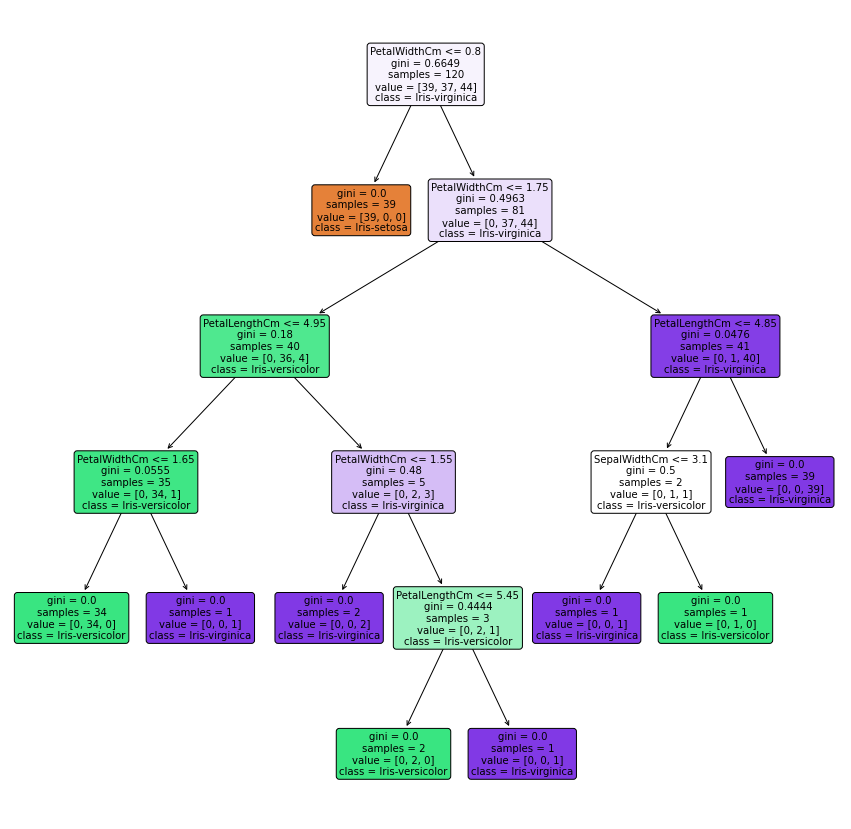

In [21]:
plt.figure(figsize=(15,15))
plot_tree(model,feature_names=df.columns,class_names=["Iris-setosa","Iris-versicolor","Iris-virginica"],
          filled=True,precision=4,rounded=True)

## Testing of model

In [28]:

pred=model.predict(X_test)  # To make predictions on the test dataset
print(pred)

[2 1 0 2 0 2 0 1 1 1 2 1 1 1 1 0 1 1 0 0 2 1 0 0 2 0 0 1 1 0]


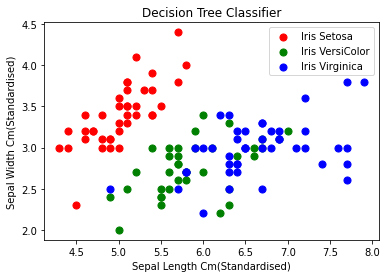

In [34]:

plt.scatter(X_train[y_train == 0,0],X_train[y_train == 0,1], s=50, color = 'red', label='Iris Setosa')
plt.scatter(X_train[y_train == 1,0],X_train[y_train == 1,1], s=50, color = 'green', label='Iris VersiColor')
plt.scatter(X_train[y_train == 2,0],X_train[y_train == 2,1], s=50, color = 'blue', label='Iris Virginica')
plt.title("Decision Tree Classifier")
plt.xlabel("Sepal Length Cm(Standardised)")
plt.ylabel("Sepal Width Cm(Standardised)")
plt.legend()
plt.show()

## Calculating the Model's accuracy/Testing Score

In [35]:
print("Testing Score: ",model.score(X_test,y_test)*100)


Testing Score:  100.0


# Thank you